## Natural Language Processing - Summer Term 2024
### Hochschule Karlsruhe
### Lecturer: Prof. Dr. Jannik Strötgen
### Tutor: Paul Löhr
### Students: Kilian Kempf (keki1011), Tom Schuck (scto1051), Tim Riffelmacher (riti1014)

# Exercise 02

### You will learn about:

- tokenization
- data cleaning and stop word removal
- stemming
- zipf's law

---

## Task 1 - Tokenization (5 P):

### Part 1

Describe what tokenization is, how it is performed, and what problems it solves.

Tokenization is the process of segmenting a sentence into a ordered sequence of tokens. A token is the occurance of a word in the sentence. The tokenizer is the system performing the tokenization. After tokenization the meaning of each token can be analyzed such that the meaning of the sentence can be inferred. A naive algorithm would split tokens at whitespaces, but this would lead to a variety of problems to due to language characterists and many special cases. A more refined algorithm is called Maxium Matching. The core idea to match the longest string in a provided dictionary and cut it out. After that the machting process repeats until no more word is left. Because of it greediness locally optimal choices may occur. Thus in practice NLP libraries are used, that take care of tokenization. The developer only needs to be aware, that different NPL libraries and their versions may lead to different results. It solves the problem of structuring the given text into smaller units such that machines are capable of carrying out further processing tasks.

### Part 2

For the later analysis of each text file, we need to identify single tokens. Therefore, you have to use a library to separate single tokens from the text. We will use the methods offered by `nltk` for this.

In [1]:
import os
import json
import nltk
import matplotlib
import numpy as np

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\I538883\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\I538883\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
with open('data/texts.json', 'r') as infile:
    data = json.load(infile)

content_debates = data['debates']
content_reddit = data['reddit']
content_tv = data['tv']

In [4]:
# 1. Tokenize the text content for the three datasets above
# 2. Print the first 20 tokens for each dataset
# 3. Now display the first paragraphs of the corresponding original text and study them. 

In [5]:
tokens_debates = nltk.tokenize.word_tokenize(content_debates)
tokens_reddit = nltk.tokenize.word_tokenize(content_reddit)
tokens_tv = nltk.tokenize.word_tokenize(content_tv)

print(">>> Debates - 20 Tokens:")
print(tokens_debates[:20])
print()
print(">>> Debates - 3 Paragraphs:")
print("\n".join(content_debates.split("\n")[:3]))
print()

print(">>> Reddit - 20 Tokens:")
print(tokens_reddit[:20])
print()
print(">>> Reddit - 3 Paragraphs:")
print("\n".join(content_reddit.split("\n")[:3]))
print()

print(">>> Tv - 20 Tokens:")
print(tokens_tv[:20])
print()
print(">>> Tv - 3 Paragraphs:")
print("\n".join(content_tv.split("\n")[:3]))
print()

>>> Debates - 20 Tokens:
['Good', 'evening', 'from', 'Hofstra', 'University', 'in', 'Hempstead', ',', 'New', 'York', '.', 'I', 'am', 'Lester', 'Holt', ',', 'anchor', 'of', '``', 'NBC']

>>> Debates - 3 Paragraphs:
 Good evening from Hofstra University in Hempstead, New York. I am Lester Holt, anchor of "NBC Nightly News.” I want to welcome you to the first presidential debate.
The participants tonight are Donald Trump and Hillary Clinton. This debate is sponsored by the Commission on Presidential Debates, a nonpartisan, nonprofit organization. The commission drafted tonight's format, and the rules have been agreed to by the campaigns.
The 90-minute debate is divided into six segments, each 15 minutes long. We'll explore three topic areas tonight: Achieving prosperity; America's direction; and securing America. At the start of each segment, I will ask the same lead-off question to both candidates, and they will each have up to two minutes to respond. From that point until the end of the

### Part 3

Does this what you expected it to do? How well does the tokenization work? What happens to special characters? Can you think of any problems?

The tokenization works as expected. It identifies all the words (and special characters) in the sentence and segments them. So in general the tokenization works fairly well, when comparing the 20 first tokens to the original contents. One thing is that special characters do remain as tokens. In particular special characters like ">", "*" or "-", that have no meaning by themselves and need to be observed in context, are hard to interpret. Furthermore words like "don't" get split into "do" and "n't" which may be hard to intepret as well. Another issue is that named entities like "Donald Trump" are divided into "Donald" and "Trump".

---

## Task 2 - Data Cleaning and Stop Word Removal (10 P):


### Part 1

In two to three sentences, describe what *data cleaning* in the context of text data refers to.

Data cleaning is the process of detecting and correcting corrupt, inaccurate or irrelevant records of a data set. After data cleaning the data set should be consistent with other similar data sets in the system. It is the prerequiste for proper analysis afterwards.

### Part 2

To have more accurate word counts and visualizations, it is often helpful to remove the capitalization of words. This is especially true for languages like German. In the following, for the three texts from above, remove any capitalization.

In [6]:
lowercase_debates = content_debates.lower()
lowercase_reddit = content_reddit.lower()
lowercase_tv = content_tv.lower()

### Part 3

Apply tokenization to the lowercase version of the texts

In [7]:
lowercase_tokens_debates = nltk.tokenize.word_tokenize(lowercase_debates)
lowercase_tokens_reddit = nltk.tokenize.word_tokenize(lowercase_reddit)
lowercase_tokens_tv = nltk.tokenize.word_tokenize(lowercase_tv)

### Part 4

In two to three sentences, describe what *stop word removal* in the context of text data refers to.

It is an often used preprocessing technique in NLP. The idea is to remove all the words that commonly occur across all the documents (e.g. articles, pronouns). In general these words don't transfer much information.

### Part 5

Now apply stop word removal to the three datasets.

Hint: Assume the texts are all written in _English_

In [8]:
stop_words = set(nltk.corpus.stopwords.words("english"))
filtered_tokens_debates = [token for token in lowercase_tokens_debates if not token in stop_words]
filtered_tokens_reddit = [token for token in lowercase_tokens_reddit if not token in stop_words]
filtered_tokens_tv = [token for token in lowercase_tokens_tv if not token in stop_words]

### Part 6

Now compare the first original sentence for each dataset with the parts remaining after performing the above steps. Write them down and explain what happens.

In [9]:
print(">>> Debates - 20 Tokens:")
print(filtered_tokens_debates[:20])
print()
print(">>> Debates - 1 Sentence:")
print(nltk.tokenize.sent_tokenize(content_debates)[0])
print()

print(">>> Reddit - 20 Tokens:")
print(filtered_tokens_reddit[:20])
print()
print(">>> Reddit - 1 Sentence:")
print(nltk.tokenize.sent_tokenize(content_reddit)[0])
print()

print(">>> Tv - 20 Tokens:")
print(filtered_tokens_tv[:20])
print()
print(">>> Tv - 1 Sentence:")
print(nltk.tokenize.sent_tokenize(content_tv)[0])
print()

>>> Debates - 20 Tokens:
['good', 'evening', 'hofstra', 'university', 'hempstead', ',', 'new', 'york', '.', 'lester', 'holt', ',', 'anchor', '``', 'nbc', 'nightly', 'news.', '”', 'want', 'welcome']

>>> Debates - 1 Sentence:
 Good evening from Hofstra University in Hempstead, New York.

>>> Reddit - 20 Tokens:
['*', '*', 'users', ':', 'please', 'consider', 'one', 'warning', '*', '*', 'reminder', 'subreddit', 'strict', 'posting/commenting', 'rules', 'enforced', 'moderation', '.', 'new', 'subreddit']

>>> Reddit - 1 Sentence:
**ALL USERS: PLEASE CONSIDER THIS YOUR ONE AND ONLY WARNING**

This is a reminder that this subreddit has strict posting/commenting rules that will be enforced by moderation.

>>> Tv - 20 Tokens:
['``', 'terms', 'laid', '.', 'wrote', '--', '>', '>', 'called', 'gold', 'standard', '.', "''", 'yeah', '.', "''", 'secretary', 'clinton', '.', '>']

>>> Tv - 1 Sentence:
"THE TERMS WERE LAID OUT.


First all the content is transformed into lowercase. Second the tokenizer is applied. At the end all stop words are removed.  

For Debates:
- Sentence: *Good evening from Hofstra University in Hempstead, New York.*
- Tokens: ['good', 'evening', 'hofstra', 'university', 'hempstead', ',', 'new', 'york', '.']  

For Reddit: 
- Sentence: *\*\*ALL USERS: PLEASE CONSIDER THIS YOUR ONE AND ONLY WARNING\*\* This is a reminder that this subreddit has strict posting/commenting rules that will be enforced by moderation.*
- Tokens: ['*', '*', 'users', ':', 'please', 'consider', 'one', 'warning', '*', '*', 'reminder', 'subreddit', 'strict', 'posting/commenting', 'rules', 'enforced', 'moderation', '.']  

For Tv:  
- Sentence: *"THE TERMS WERE LAID OUT.*
- Tokens: ['``', 'terms', 'laid', '.']

---

## Task 3 - Stemming (10 P):


### Part 1

In two to three sentences, describe what *stemming* in the context of text data refers to.

It is the process of reducing inflected words to their stem. Or more simply put: The last few characters (suffix) of a given word are (is) removed to obtain a shorter form. This form may not appear in a dictionary. Goal is to reduce the number of unique words by grouping word variations based on their root.

### Part 2

Think about how you would go about implementing your own stemmer?
Come up with at least ten rules and write them down.

Hint: For example:

```*s -> *   # remove trailing s```

```*e -> *   # remove trailing e```  
```*ed -> *   # remove trailing ed```  
```*er -> *   # remove trailing er```  
```*es -> *   # remove trailing es```  
```*ies -> *   # remove trailing ies```  
```*ing -> *   # remove trailing ing```  
```*al -> *   # remove trailing al```  
```*ity -> *   # remove trailing ity```  
```*ly -> *   # remove trailing ly```  
```*y -> *i   # replace trailing y by i```  

### Part 3

Use the cleaned word tokens (Step 5 above) and apply stemming. Use the Snowball Stemmer

In [10]:
snow_stemmer = nltk.stem.SnowballStemmer(language="english")
stemmed_tokens_debates = [snow_stemmer.stem(token) for token in filtered_tokens_debates]
stemmed_tokens_reddit = [snow_stemmer.stem(token) for token in filtered_tokens_reddit]
stemmed_tokens_tv = [snow_stemmer.stem(token) for token in filtered_tokens_tv]

print(">>> Debates - 40 Stemmed Tokens:")
print(stemmed_tokens_debates[:40])
print(">>> Debates - 40 Filtered Tokens:")
print(filtered_tokens_debates[:40])
print()

print(">>> Reddit - 40 Stemmed Tokens:")
print(stemmed_tokens_reddit[:40])
print(">>> Reddit - 40 Filtered Tokens:")
print(filtered_tokens_reddit[:40])
print()

print(">>> Tv - 40 Stemmed Tokens:")
print(stemmed_tokens_tv[:40])
print(">>> Tv - 40 Filtered Tokens:")
print(filtered_tokens_tv[:40])
print()

>>> Debates - 40 Stemmed Tokens:
['good', 'even', 'hofstra', 'univers', 'hempstead', ',', 'new', 'york', '.', 'lester', 'holt', ',', 'anchor', '``', 'nbc', 'night', 'news.', '”', 'want', 'welcom', 'first', 'presidenti', 'debat', '.', 'particip', 'tonight', 'donald', 'trump', 'hillari', 'clinton', '.', 'debat', 'sponsor', 'commiss', 'presidenti', 'debat', ',', 'nonpartisan', ',', 'nonprofit']
>>> Debates - 40 Filtered Tokens:
['good', 'evening', 'hofstra', 'university', 'hempstead', ',', 'new', 'york', '.', 'lester', 'holt', ',', 'anchor', '``', 'nbc', 'nightly', 'news.', '”', 'want', 'welcome', 'first', 'presidential', 'debate', '.', 'participants', 'tonight', 'donald', 'trump', 'hillary', 'clinton', '.', 'debate', 'sponsored', 'commission', 'presidential', 'debates', ',', 'nonpartisan', ',', 'nonprofit']

>>> Reddit - 40 Stemmed Tokens:
['*', '*', 'user', ':', 'pleas', 'consid', 'one', 'warn', '*', '*', 'remind', 'subreddit', 'strict', 'posting/com', 'rule', 'enforc', 'moder', '.', 'n

### Part 4

Compare the results of the Snowball Stemmer with your stemming rules. How do they differ, how could you improve your stemmer?

All defined rules in our own stemmer can be discovered in the snow stemmer.  
But: The word "participants" is shortened to "particip". So we could introduce the following rule:  
```*ants -> *   # remove trailing ants```  
Another example is the word "commission". It is shortened to "commiss". Thus we can introduce the following rule:  
```*ion -> *   # remove trailing ion```  

### Part 5

Create the word clouds from Exercise 1 again, but now with the preprocessed text.

What changes do you see?

Debates (original):


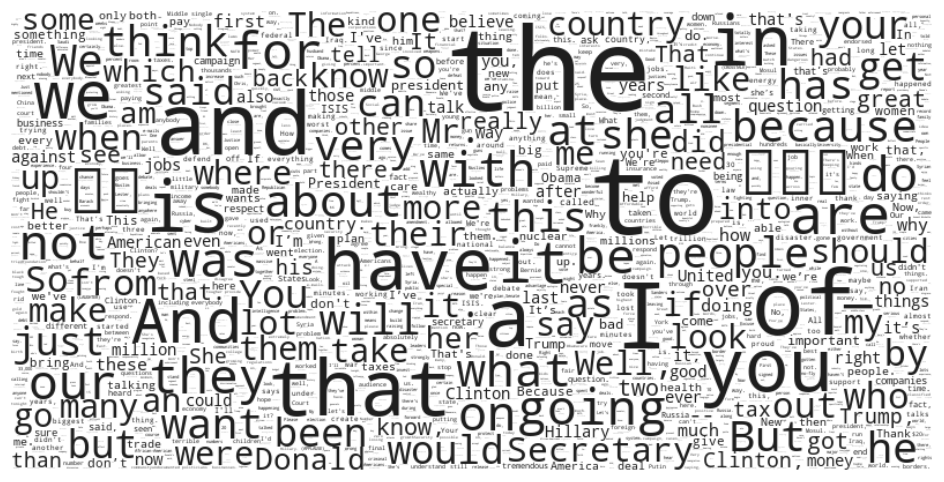

Debates (preprocessed):


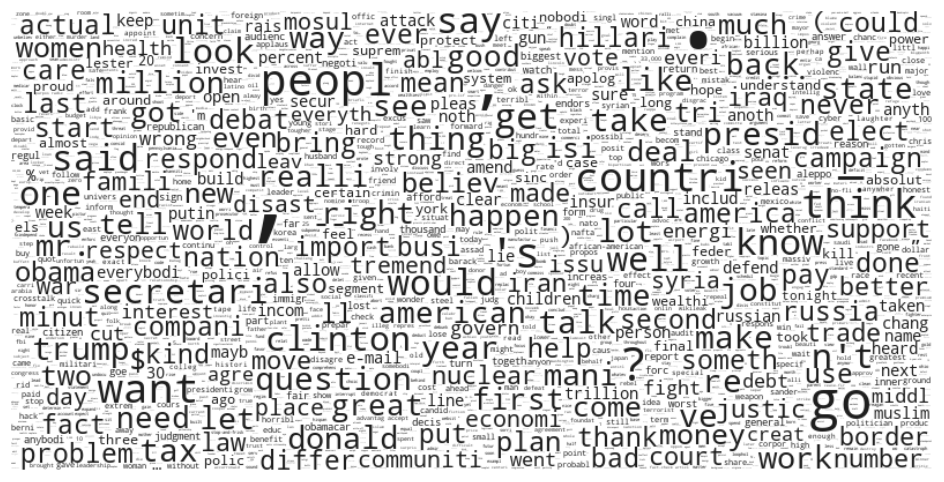

Reddit (original):


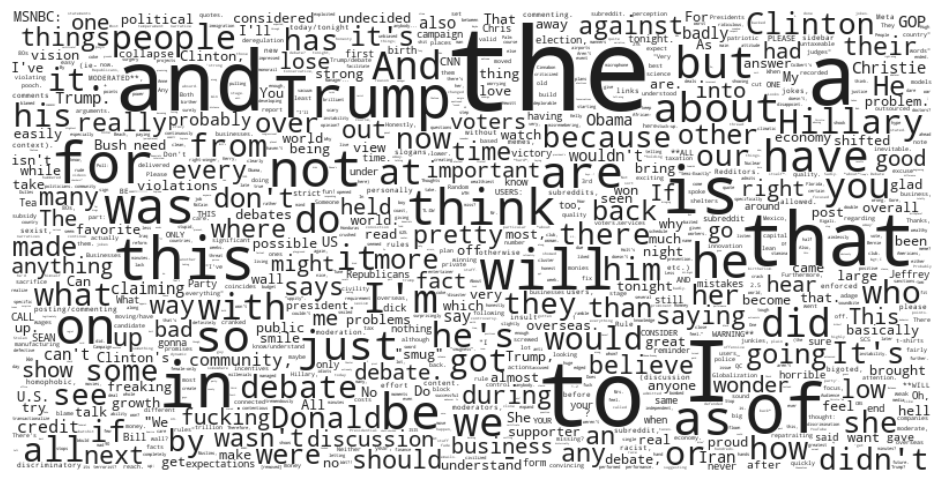

Reddit (preprocessed):


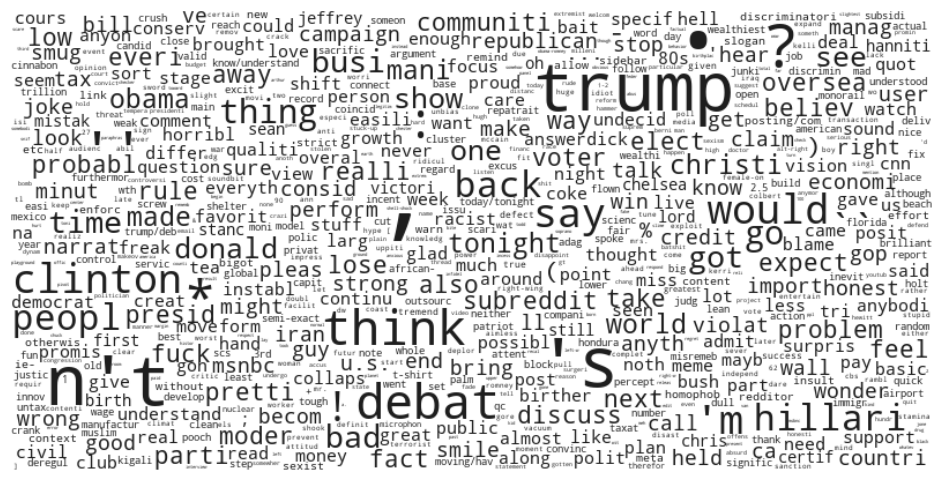

Tv (original):


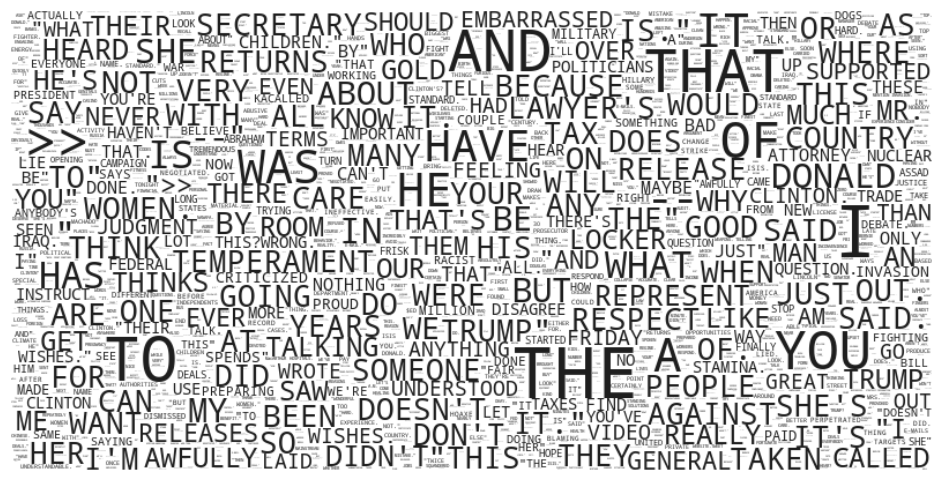

Tv (preprocessed):


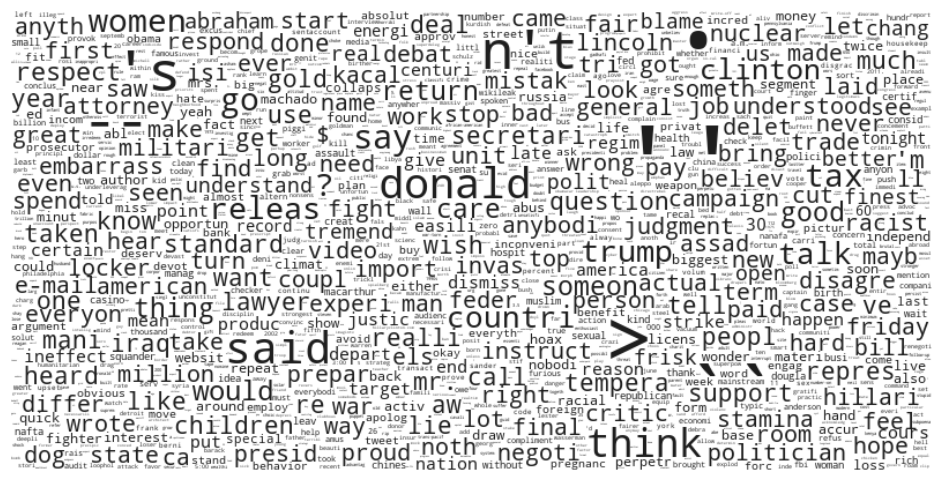

In [11]:
from utils import create_word_cloud

word_count_debates = nltk.FreqDist([token for token in content_debates.replace("\n", " ").split(" ")])
word_count_reddit = nltk.FreqDist([token for token in content_reddit.replace("\n", " ").split(" ")])
word_count_tv = nltk.FreqDist([token for token in content_tv.replace("\n", " ").split(" ")])

word_count_debates_preprocessed = nltk.FreqDist(stemmed_tokens_debates)
word_count_reddit_preprocessed = nltk.FreqDist(stemmed_tokens_reddit)
word_count_tv_preprocessed = nltk.FreqDist(stemmed_tokens_tv)

create_word_cloud(word_count_debates, "Debates (original)")
create_word_cloud(word_count_debates_preprocessed, "Debates (preprocessed)")

create_word_cloud(word_count_reddit, "Reddit (original)")
create_word_cloud(word_count_reddit_preprocessed, "Reddit (preprocessed)")

create_word_cloud(word_count_tv, "Tv (original)")
create_word_cloud(word_count_tv_preprocessed, "Tv (preprocessed)")

So one significant difference is that uninformative words like "that", "the" or "a" are no more visible in the word clouds. Words with more meaning like "trump", "problem" and "think" take up the space. Another observation is that all words are in lower case now. A remaining problem is that special characters are still dominant in all the word clouds. In addition to that the stop word removal retains some artifacts like "'s" in the text.

## Task 4 - Zipf's Law (5 P):

In the lecture, you have heard about Zipf’s law. 

### Part 1

State Zipf's law

The observation is that few words are very frequent and most words are rather seldom. The corresponding formula is depicted:  
$$f(w) \propto \frac{1}{r(w)^\alpha}$$
f(w) is the fequency and r(w) the rank of a word. The alpha differs from language to language and is in English set to 1.

### Part 2

Check if Zipf's law (approximately) holds for our three datasets after all preprocessing steps.

For this, plot Zipf's law and the word distribution for each of the datasets.

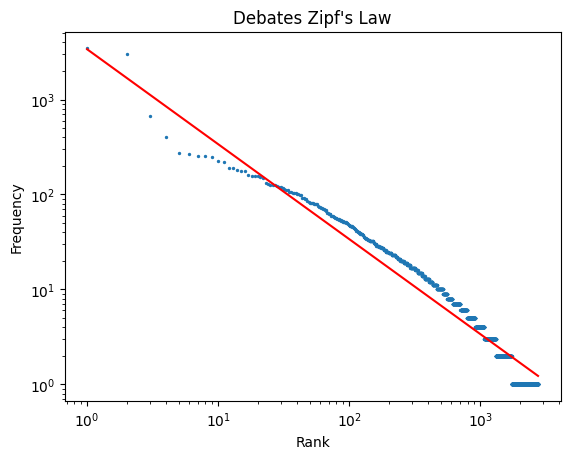

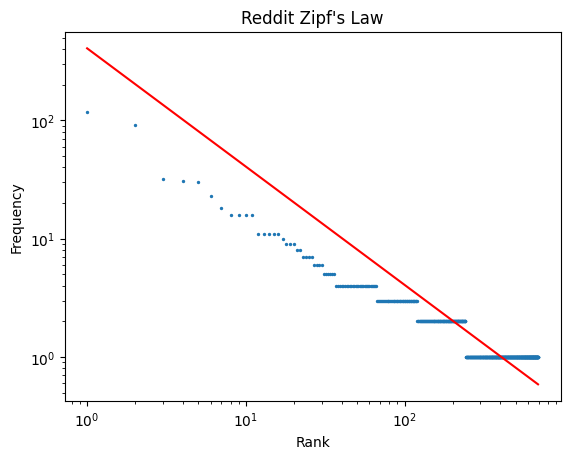

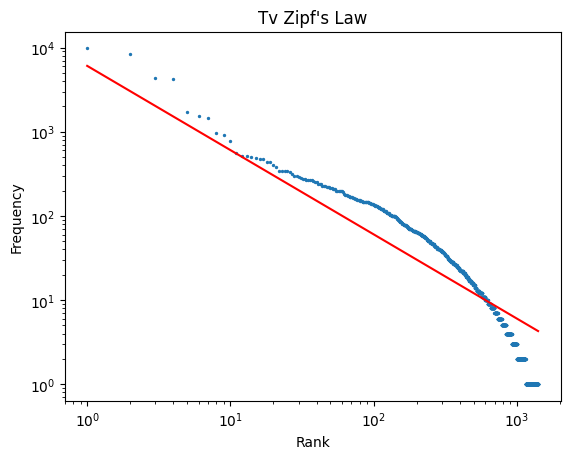

In [12]:
import matplotlib.pyplot as plt


def plot_zipf_law(token_freq, title):
    sorted_freq = sorted(token_freq.values(), reverse=True)
    ranks = range(1, len(sorted_freq) + 1)
    average_product = sum([rank * freq for rank, freq in zip(ranks, sorted_freq)]) / len(sorted_freq)

    plt.scatter(ranks, sorted_freq, s=2)
    plt.plot(ranks, [average_product / rank for rank in ranks], color='red')

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title(f'{title} Zipf\'s Law')
    plt.show()


plot_zipf_law(word_count_debates_preprocessed, "Debates")
plot_zipf_law(word_count_reddit_preprocessed, "Reddit")
plot_zipf_law(word_count_tv_preprocessed, "Tv")

### Part 3

Describe your plots and discuss your findings.

The plots show the word distributions of the three datasets (blue) and Zipf's curve (red) as a reference line in a log-log scale. 

Zipf's law states that the frequency of a word is inversely proportional to its rank, which means that the product of rank and frequency is constant. To provide a reference line, the Zipf's curve was calculated by averaging the aforementioned product of rank and frequency for each word. The resulting constant is then divided by the rank to get the frequency for each rank:
$$f(w)^* = \frac{\frac{1}{n}\sum_{i = 0}^{n}{f(w_i) * r(w_i)}}{r(w)}$$

When comparing the word distributions to the reference line, it can be observed that all word distributions approximate a linear curve in the log-log scale. Therefore, it can be concluded that Zipf's law approximately holds for the datasets.

An interesting observation is that especially in the plot regarding Reddit a stair-like shape is visible. This indicates an uneven frequency distribution, because many words in the dataset have the same frequency.

---

#### Submitting your results:

To submit your results, please:

- save this file, i.e., `ex??_assignment.ipynb`.
- if you reference any external files (e.g., images), please create a zip or rar archieve and put the notebook files and all referenced files in there.
- login to ILIAS and submit the `*.ipynb` or archive for the corresponding assignment.

**Remarks:**
    
- Do not copy any code from the Internet. In case you want to use publicly available code, please, add the reference to the respective code snippet.
- Check your code compiles and executes, even after you have restarted the Kernel.
- Submit your written solutions and the coding exercises within the provided spaces and not otherwise.
- Write the names of your partner and your name in the top section.